In [194]:
import csv
import fastai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from fastai.tabular import add_datepart
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score


In [195]:
df = pd.read_csv('/content/drive/MyDrive/MLproject/DRREDDY.csv')
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1827.672814,1830.099821,1855.226715,1803.185488,1828.279693,1828.382689,1829.621266,4.409815e+05,1.045022e+14,37121.187296,2.174943e+05,0.523664
std,1092.984492,1095.534718,1106.531082,1082.903924,1093.978015,1093.927165,1094.668053,6.060398e+05,2.719076e+14,39213.885661,1.871552e+05,0.165854
min,374.000000,365.650000,384.950000,355.250000,375.150000,374.000000,372.550000,7.070000e+02,4.333085e+10,450.000000,7.070000e+02,0.036800
25%,906.175000,908.175000,923.175000,897.000000,906.125000,906.175000,907.810000,1.669668e+05,1.787360e+13,17731.000000,9.731900e+04,0.411500
50%,1538.825000,1539.500000,1565.375000,1511.125000,1539.000000,1539.400000,1540.465000,2.959825e+05,4.506694e+13,27115.000000,1.692400e+05,0.539100
75%,2609.337500,2612.000000,2641.500000,2582.900000,2609.812500,2609.625000,2608.522500,5.271700e+05,1.020985e+14,43138.750000,2.769510e+05,0.644200
max,5416.800000,5440.950000,5512.650000,5329.450000,5413.000000,5416.800000,5396.870000,2.198715e+07,1.157853e+16,929801.000000,2.065429e+06,1.000000


<Figure size 1440x576 with 0 Axes>

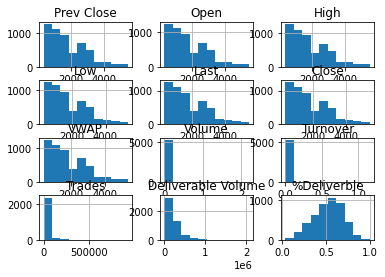

In [196]:
#Visualization
#histogram
fig = plt.figure(figsize =(20,8))
df.hist()
fig.show()

In [197]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open','High','Volume'])
new_data['Date'] = df['Date'].values
new_data['Close'] = df['Close'].values
new_data['Open'] = df['Open'].values
new_data['High'] = df['High'].values
new_data['Volume'] = df['Volume'].values

In [119]:
new_data

,Date,Close,Open,High,Volume
0,2000-01-03,1508.25,1505.00,1508.25,13280
1,2000-01-04,1628.95,1590.00,1628.95,57142
2,2000-01-05,1568.05,1549.00,1650.00,119697
3,2000-01-06,1661.55,1599.00,1693.50,121966
4,2000-01-07,1529.10,1685.00,1685.00,79641
...,...,...,...,...,...
5301,2021-04-26,5066.70,5125.00,5130.00,950577
5302,2021-04-27,5057.25,5090.50,5116.00,957835
5303,2021-04-28,5044.45,5082.55,5106.90,843953
5304,2021-04-29,5102.30,5070.25,5144.00,1071931


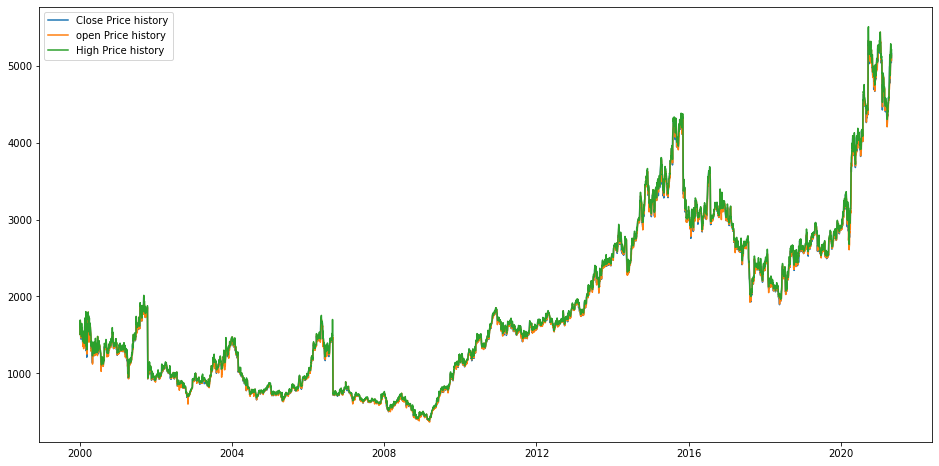

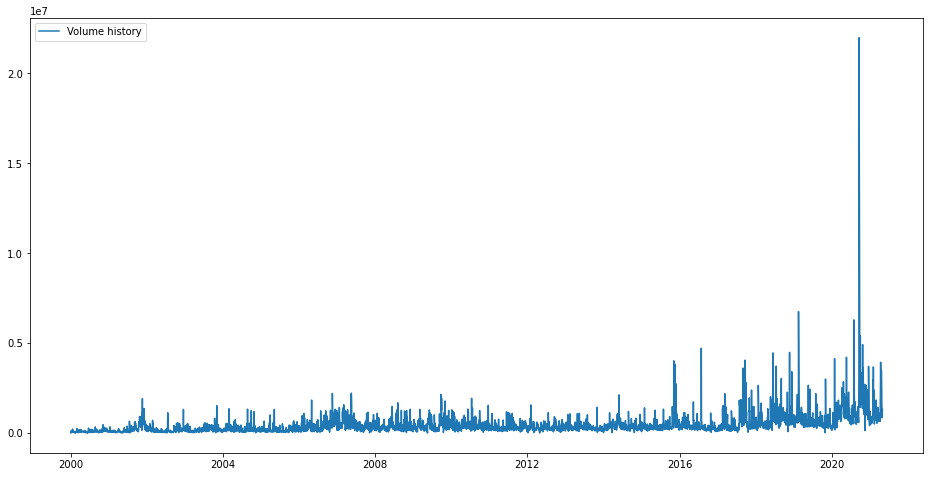

<Figure size 1152x648 with 0 Axes>

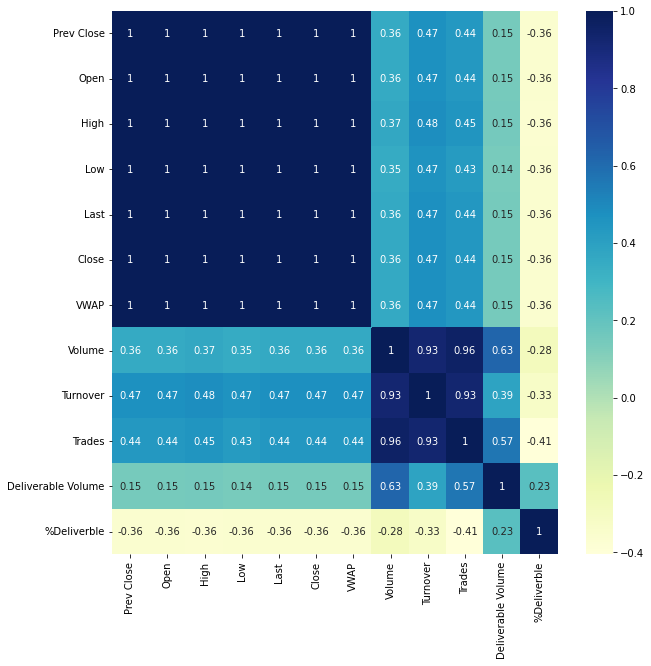

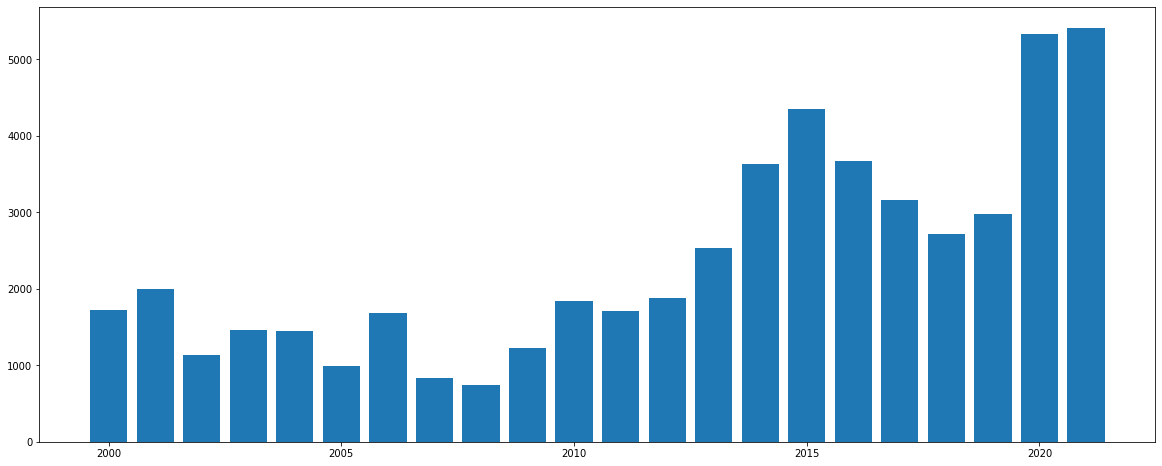

In [198]:
#Visualization
#histogram
#data Close, High, Open
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'], label='Close Price history')
plt.plot(df['Date'],df['Open'], label='open Price history')
plt.plot(df['Date'],df['High'], label='High Price history')
plt.legend()
plt.show()
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Volume'], label='Volume history')
plt.legend()
plt.show()

#subplots
plt.figure(figsize=(16,9))
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Horizontal Bar Plot
df1 = df
df1.index=df1['Date']
df1['year'] = df1.index.year
fig = plt.figure(figsize =(20,8))
plt.bar(df1['year'],df1['Close'])
plt.show()

In [120]:
import fastai

In [199]:
from fastai.tabular import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [122]:
new_data

,Close,Open,High,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1508.25,1505.00,1508.25,13280,2000,1,1,3,0,3,False,False,False,False,False,False
1,1628.95,1590.00,1628.95,57142,2000,1,1,4,1,4,False,False,False,False,False,False
2,1568.05,1549.00,1650.00,119697,2000,1,1,5,2,5,False,False,False,False,False,False
3,1661.55,1599.00,1693.50,121966,2000,1,1,6,3,6,False,False,False,False,False,False
4,1529.10,1685.00,1685.00,79641,2000,1,1,7,4,7,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,5066.70,5125.00,5130.00,950577,2021,4,17,26,0,116,False,False,False,False,False,False
5302,5057.25,5090.50,5116.00,957835,2021,4,17,27,1,117,False,False,False,False,False,False
5303,5044.45,5082.55,5106.90,843953,2021,4,17,28,2,118,False,False,False,False,False,False
5304,5102.30,5070.25,5144.00,1071931,2021,4,17,29,3,119,False,False,False,False,False,False


In [200]:
new_data.shape

(5306, 16)

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scal = scaler.fit_transform(new_data)

In [202]:
train = scal[:3714]
test = scal[3714:]

In [211]:

x_train = train[:,1:]
y_train = train[:,0]
x_test = test[:, 1:]
y_test = test[:, 0]


#Linear Regression

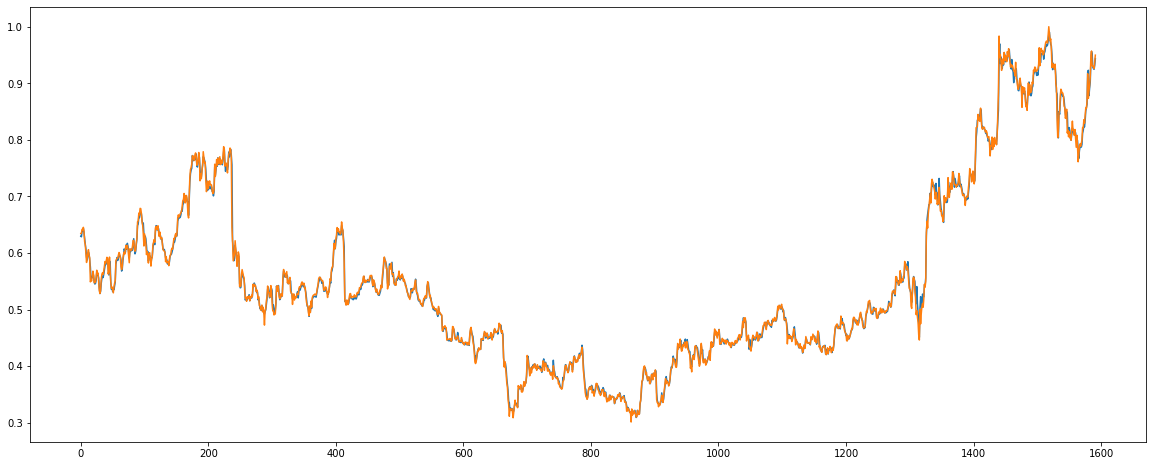

R^2:  0.9980198992653005
Mean Absolute Error: 0.5517274993654738
Coefficient of Determination: 0.9980198992653005
MSE:  5.047903332811966e-05
RMSE:  0.007104859838738528


In [219]:
class LinearRegression:
    def __init__(self,lr=0.00005,itr=1500):
        self.lr = lr
        self.itr = itr

    def fit(self,X,y):
        self.m, self.n = X.shape
        self.X = np.append(np.ones((self.m, 1)), X, axis=1)
        self.y = y
        # h(x) = theta . X
        self.theta = np.zeros(self.n + 1)
        for i in range(self.itr):
            self.gradient_descent()
        return self
    
    def gradient_descent(self):
        y_pred = np.dot(self.X, self.theta)
        # calculate gradient
        dtheta = (1.0/self.m) * np.dot(self.X.T,(y_pred - self.y))
        # update weights
        self.theta -= self.lr * dtheta
        return self
    
    def predict(self,X):
        m,n = X.shape
        X = np.append(np.ones((m, 1)), X, axis=1)
        return np.dot(X,self.theta)
    
    def score(self,X,y):
        y_pred = self.predict(X)

        u = ((y-y_pred)**2).sum()
        v = ((y-y.mean())**2).sum()
        return (1-(u/v))

model = LinearRegression(lr = 0.0000002,itr=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

#vizulization predictions Vs actual
fig = plt.figure(figsize =(20,8))
plt.plot(preds_linear,label = 'prediction')
plt.plot(y_test, label = 'actual')
plt.show()
ac_lr = lr_model.score(x_test,y_test)
print('R^2: ',ac_lr)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, preds_linear))
print("MSE: ",mean_squared_error(y_test, preds_linear))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, preds_linear)))

#Linear Regss

In [254]:
def cost_function(X, y, w, b):
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def gradient_descent_function(X, y, w, b, alpha=0.001, epochs=1000):
    m = len(y)
    costs = [0] * epochs
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs


# Initial random weights
w = np.random.randn(x_train.shape[1])
# Initial bias
bias = 0
weights, bias, costs = gradient_descent_function(x_train, y_train, w, bias, epochs=1500);

def predict(X, w, b):
    return X.dot(w) + b

ydfg = predict(x_test, weights, bias)
mean_squared_error(y_test, ydfg)*100

70.75258230750649

In [ ]:
#vizulization predictions Vs actual
fig = plt.figure(figsize =(20,8))
plt.plot(preds_linear,label = 'prediction')
plt.plot(y_test, label = 'actual')
plt.show()
ac_lr = lr_model.score(x_test,y_test)
print('R^2: ',ac_lr)
print("Mean Absolute Error:", mean_absolute_error(y_test, preds_linear))
print("Coefficient of Determination:", r2_score(y_test, preds_linear))
print("MSE: ",mean_squared_error(y_test, preds_linear))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, preds_linear)))

#Decision tree

In [128]:
#Decision Tree

#Building Decision Tree Model

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0)

dtree.fit(x_train,y_train)

pred_Dtree = dtree.predict(x_test)

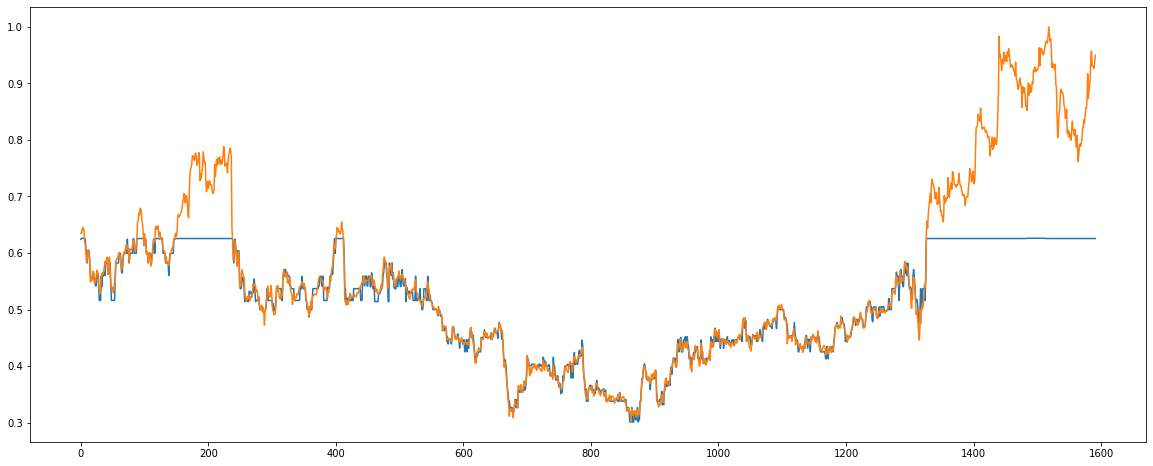

In [168]:
fig = plt.figure(figsize =(20,8))
plt.plot(pred_Dtree,label = 'prediction')
plt.plot(y_test, label = 'actual')
plt.show()

In [170]:
dscore = dtree.score(x_test,y_test)
dscore

0.6384883429035854

#Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor
rnd= RandomForestRegressor()
c = rnd.fit(x_train, y_train)
rc = rnd.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


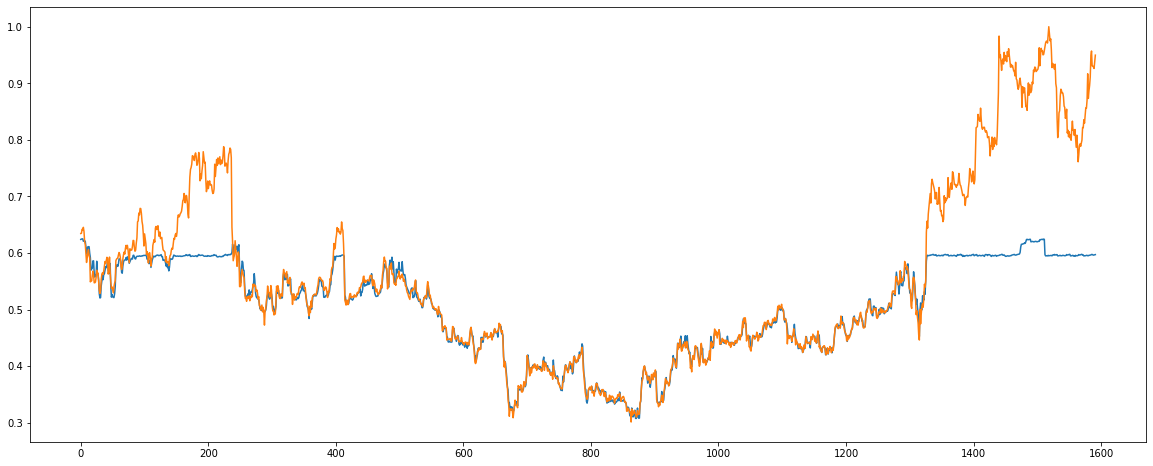

In [136]:
fig = plt.figure(figsize =(20,8))
plt.plot(rc)
plt.plot(y_test)

In [163]:
rnd_mod = rnd.score(x_test,y_test)
rnd_mod

0.5501727422675076

#Final


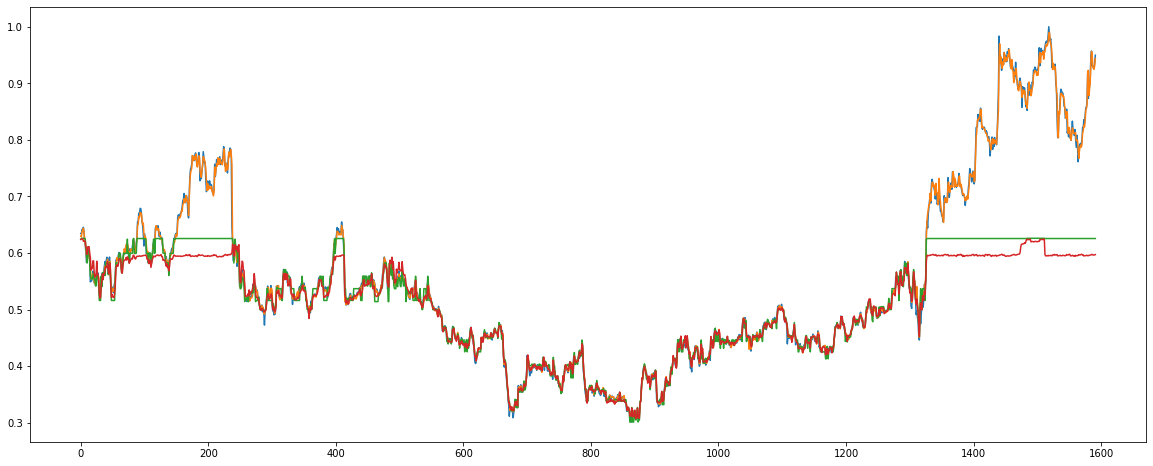

In [175]:
fig = plt.figure(figsize =(20,8))
plt.plot(y_test, label='actual')
plt.plot(preds_linear,label = 'linear_prediction')
plt.plot(pred_Dtree, label = 'Dtree prediction')
plt.plot(rc,label = 'Dtree prediction')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


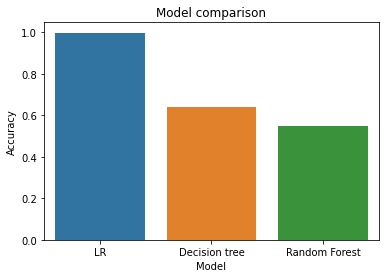

In [188]:
sns.barplot(['LR','Decision tree','Random Forest'],[ac_lr,dscore,rnd_mod])

plt.title('Model comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [176]:
print("R^2 scores\nlinear regression: ",ac_lr,"\ndecission tree regressor: ",dscore,'\nRandom forest regressor: ',rnd_mod)

R^2 scores
linear regression:  0.9980198992653005 
decission tree regressor:  0.6384883429035854 
Random forest regressor:  0.5501727422675076


In [178]:
print("Rmse scores\nlinear regression: ",np.sqrt(mean_squared_error(y_test, preds_linear)),"\ndecission tree regressor: ",np.sqrt(mean_squared_error(y_test, pred_Dtree)),'\nRandom forest regressor: ',np.sqrt(mean_squared_error(y_test, rc)))

Rmse scores
linear regression:  0.007104859838738528 
decission tree regressor:  0.09600039617032455 
Random forest regressor:  0.10708650793024868


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


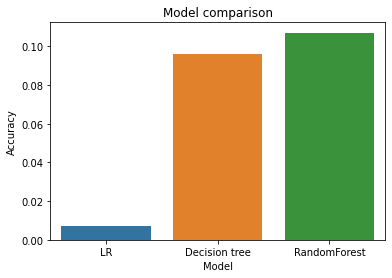

In [189]:
sns.barplot(['LR','Decision tree','RandomForest'],[np.sqrt(mean_squared_error(y_test, preds_linear)),np.sqrt(mean_squared_error(y_test, pred_Dtree)),np.sqrt(mean_squared_error(y_test, rc))])

plt.title('Model comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

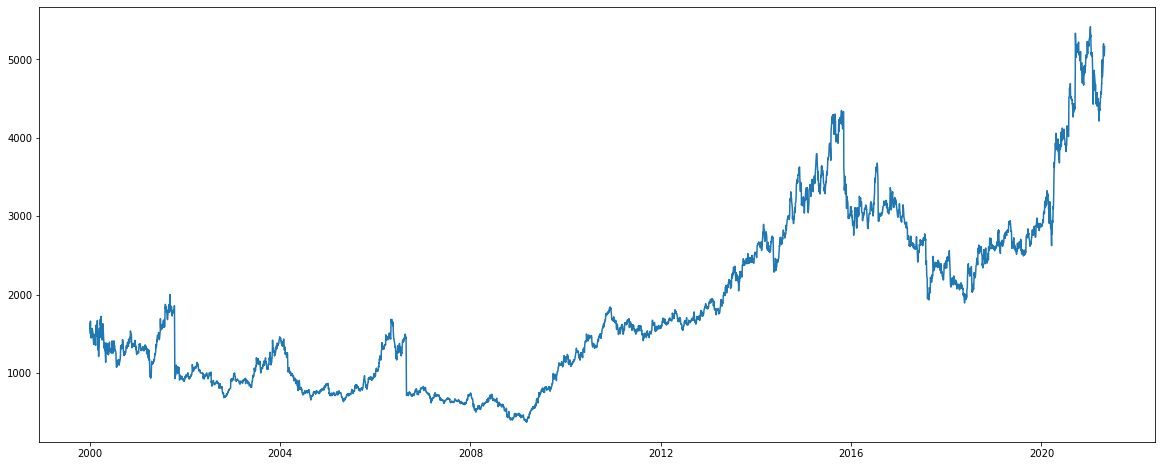

In [191]:
fig = plt.figure(figsize =(20,8))
plt.plot(df['Date'],df['Close'], label='Close Price history')